In [1]:
from tools.Nth_Order_ECM import Nth_Order_ECM
from tools.tools import *
from tools.generate_training_data import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

In [2]:
# Compare 2 ecm, one 1st order and the second 2nd order, over 15, 25 and 45 degrees:
# first on charge data using mean and ch parameters
# second on discharge data using mean and dch parameters
# Use RMSE as metric
temperature = ["15","25","45"]
ecm_ch, ecm_dch, ecm_mean = load_data_LGHE4C25B01_Parameter()
data_ch, data_dch = load_data_LGHE4C25B01()

log = {}
log_ch = {}
log_dch = {}


for T in temperature:
    f_mean = interpolate_ecm_parameter(data=ecm_mean, deg=20, deg_ocv=20, T=T, from_data="mean", order=2, plot=False)
    
    dt_ch = np.abs(data_ch[T]["Ah"][10]-data_ch[T]["Ah"][9])/np.abs(data_ch[T]["I"][0])
    dt_dch = np.abs(data_dch[T]["Ah"][10]-data_dch[T]["Ah"][9])/np.abs(data_dch[T]["I"][0])
    dt_mean = (dt_ch+dt_dch)/2

    U_ch = data_ch[T]["U"]
    U_dch = data_dch[T]["U"]

    I_ch = data_ch[T]["I"]
    I_dch = data_dch[T]["I"]
    
    C_ref_ch = np.mean(data_ch[T]["Cap"])
    C_ref_dch = np.mean(data_dch[T]["Cap"])
    C_ref_mean = np.mean([C_ref_ch,C_ref_dch])
    
    soc_init_ch = data_ch[T]["Ah"][0]/data_ch[T]["Cap"][0]
    soc_init_dch = data_dch[T]["Ah"][0]/data_dch[T]["Cap"][0]
    
   
    bm_2_ch = Nth_Order_ECM(R0=f_mean["R0"], 
                       Rs=[f_mean["R1"],f_mean["R2"]],
                       Taus=[f_mean["Tau1"],f_mean["Tau2"]],
                       ocv_grid=f_mean["ocv_grid"],
                       C_ref=C_ref_ch,
                       soc_init=soc_init_ch, 
                       ts=dt_ch,
                       T=T)
    
    bm_1_ch = Nth_Order_ECM(R0=f_mean["R0"], 
                       Rs=[f_mean["R1"]],
                       Taus=[f_mean["Tau1"]],
                       ocv_grid=f_mean["ocv_grid"],
                       C_ref=C_ref_ch,
                       soc_init=soc_init_ch, 
                       ts=dt_ch,
                       T=T)
    
    log_ch["2"] = simulate_ecm(ecm=bm_2_ch, current=I_ch, order=2)
    log_ch["1"] = simulate_ecm(ecm=bm_1_ch, current=I_ch, order=1)
    

    bm_2_dch = Nth_Order_ECM(R0=f_mean["R0"], 
                       Rs=[f_mean["R1"],f_mean["R2"]],
                       Taus=[f_mean["Tau1"],f_mean["Tau2"]],
                       ocv_grid=f_mean["ocv_grid"],
                       C_ref=C_ref_dch,
                       soc_init=soc_init_dch, 
                       ts=dt_dch,
                       T=T)
    bm_1_dch = Nth_Order_ECM(R0=f_mean["R0"], 
                       Rs=[f_mean["R1"]],
                       Taus=[f_mean["Tau1"]],
                       ocv_grid=f_mean["ocv_grid"],
                       C_ref=C_ref_dch,
                       soc_init=soc_init_dch, 
                       ts=dt_dch,
                       T=T)
    
    log_dch["2"] = simulate_ecm(ecm=bm_2_dch, current=I_dch, order=2)
    log_dch["1"] = simulate_ecm(ecm=bm_1_dch, current=I_dch, order=1)



    rmse_1_ch = rmse(log_ch["1"]["V"], U_ch)
    rmse_2_ch = rmse(log_ch["2"]["V"], U_ch)
    rmse_1_dch = rmse(log_dch["1"]["V"], U_dch)
    rmse_2_dch = rmse(log_dch["2"]["V"], U_dch)
    
    print(f"RMSE ecm 1:{rmse_1_ch}\nRMSE ecm 2:{rmse_2_ch} at charge\nRMSE ecm 1:{rmse_1_dch}\nRMSE ecm 2:{rmse_2_dch} at discharge")


C:\Users\Bouraoui\AppData\Local\Temp\ipykernel_4380\2707338056.py:15: RankWarning: Polyfit may be poorly conditioned
  f_mean = interpolate_ecm_parameter(data=ecm_mean, deg=20, deg_ocv=20, T=T, from_data="mean", order=2, plot=False)
C:\Users\Bouraoui\AppData\Local\Temp\ipykernel_4380\2707338056.py:15: RankWarning: Polyfit may be poorly conditioned
  f_mean = interpolate_ecm_parameter(data=ecm_mean, deg=20, deg_ocv=20, T=T, from_data="mean", order=2, plot=False)
C:\Users\Bouraoui\AppData\Local\Temp\ipykernel_4380\2707338056.py:15: RankWarning: Polyfit may be poorly conditioned
  f_mean = interpolate_ecm_parameter(data=ecm_mean, deg=20, deg_ocv=20, T=T, from_data="mean", order=2, plot=False)
C:\Users\Bouraoui\AppData\Local\Temp\ipykernel_4380\2707338056.py:15: RankWarning: Polyfit may be poorly conditioned
  f_mean = interpolate_ecm_parameter(data=ecm_mean, deg=20, deg_ocv=20, T=T, from_data="mean", order=2, plot=False)
C:\Users\Bouraoui\AppData\Local\Temp\ipykernel_4380\2707338056.py:15

RMSE ecm 1:0.05248592967466305
RMSE ecm 2:0.05243034695688368 at charge
RMSE ecm 1:0.052167266598045714
RMSE ecm 2:0.05204460063238152 at discharge


C:\Users\Bouraoui\AppData\Local\Temp\ipykernel_4380\2707338056.py:15: RankWarning: Polyfit may be poorly conditioned
  f_mean = interpolate_ecm_parameter(data=ecm_mean, deg=20, deg_ocv=20, T=T, from_data="mean", order=2, plot=False)
C:\Users\Bouraoui\AppData\Local\Temp\ipykernel_4380\2707338056.py:15: RankWarning: Polyfit may be poorly conditioned
  f_mean = interpolate_ecm_parameter(data=ecm_mean, deg=20, deg_ocv=20, T=T, from_data="mean", order=2, plot=False)
C:\Users\Bouraoui\AppData\Local\Temp\ipykernel_4380\2707338056.py:15: RankWarning: Polyfit may be poorly conditioned
  f_mean = interpolate_ecm_parameter(data=ecm_mean, deg=20, deg_ocv=20, T=T, from_data="mean", order=2, plot=False)
C:\Users\Bouraoui\AppData\Local\Temp\ipykernel_4380\2707338056.py:15: RankWarning: Polyfit may be poorly conditioned
  f_mean = interpolate_ecm_parameter(data=ecm_mean, deg=20, deg_ocv=20, T=T, from_data="mean", order=2, plot=False)
C:\Users\Bouraoui\AppData\Local\Temp\ipykernel_4380\2707338056.py:15

RMSE ecm 1:0.05171971524013791
RMSE ecm 2:0.05168991864585451 at charge
RMSE ecm 1:0.05085698487230987
RMSE ecm 2:0.05076171759258699 at discharge


C:\Users\Bouraoui\AppData\Local\Temp\ipykernel_4380\2707338056.py:15: RankWarning: Polyfit may be poorly conditioned
  f_mean = interpolate_ecm_parameter(data=ecm_mean, deg=20, deg_ocv=20, T=T, from_data="mean", order=2, plot=False)
C:\Users\Bouraoui\AppData\Local\Temp\ipykernel_4380\2707338056.py:15: RankWarning: Polyfit may be poorly conditioned
  f_mean = interpolate_ecm_parameter(data=ecm_mean, deg=20, deg_ocv=20, T=T, from_data="mean", order=2, plot=False)
C:\Users\Bouraoui\AppData\Local\Temp\ipykernel_4380\2707338056.py:15: RankWarning: Polyfit may be poorly conditioned
  f_mean = interpolate_ecm_parameter(data=ecm_mean, deg=20, deg_ocv=20, T=T, from_data="mean", order=2, plot=False)
C:\Users\Bouraoui\AppData\Local\Temp\ipykernel_4380\2707338056.py:15: RankWarning: Polyfit may be poorly conditioned
  f_mean = interpolate_ecm_parameter(data=ecm_mean, deg=20, deg_ocv=20, T=T, from_data="mean", order=2, plot=False)
C:\Users\Bouraoui\AppData\Local\Temp\ipykernel_4380\2707338056.py:15

RMSE ecm 1:0.051099581104878646
RMSE ecm 2:0.051080387380716664 at charge
RMSE ecm 1:0.04860110443331028
RMSE ecm 2:0.048550949310163447 at discharge


In [3]:
# Load the FUDS csv file
fuds = pd.read_csv("data/LGHE4_data/HE4C25B01_MultiFUDS_25dg_fan_startS5_NormTab.csv")

# Load the ECM parameter
_,_,ecm_param_mean = load_data_LGHE4C25B01_Parameter()

# Extract the relevant data for the ECM and the NNs:
# Extract time step dt (here the average time step)
dt = np.mean(np.diff(fuds["Test_Time"].values.astype(np.float32)))

# Extract the Current array
I = fuds["Current"].values.astype(np.float32)

# Extract maximum capacity of the battery
C_ref = 2.5# np.max(fuds["Charge_Capacity"].values.astype(np.float32))

# Extract the SOC array: (charge capacity array)/max charge capacity
soc = fuds["Charge_Capacity"].values.astype(np.float32)/C_ref

# Create temperature array (the name of the csv file has 25dg in it. So I suppose T= 25°C)
T = np.ones(np.shape(I))*25.0

# Extract the terminal voltage array
U = fuds["Voltage"].values.astype(np.float32)

C:\Users\Bouraoui\AppData\Local\Temp\ipykernel_4380\2524879472.py:4: RankWarning: Polyfit may be poorly conditioned
  f_mean = interpolate_ecm_parameter(data=ecm_mean, deg=20, T="25", from_data="mean", order=2, plot=True)
C:\Users\Bouraoui\AppData\Local\Temp\ipykernel_4380\2524879472.py:4: RankWarning: Polyfit may be poorly conditioned
  f_mean = interpolate_ecm_parameter(data=ecm_mean, deg=20, T="25", from_data="mean", order=2, plot=True)
C:\Users\Bouraoui\AppData\Local\Temp\ipykernel_4380\2524879472.py:4: RankWarning: Polyfit may be poorly conditioned
  f_mean = interpolate_ecm_parameter(data=ecm_mean, deg=20, T="25", from_data="mean", order=2, plot=True)
C:\Users\Bouraoui\AppData\Local\Temp\ipykernel_4380\2524879472.py:4: RankWarning: Polyfit may be poorly conditioned
  f_mean = interpolate_ecm_parameter(data=ecm_mean, deg=20, T="25", from_data="mean", order=2, plot=True)
C:\Users\Bouraoui\AppData\Local\Temp\ipykernel_4380\2524879472.py:4: RankWarning: Polyfit may be poorly conditio

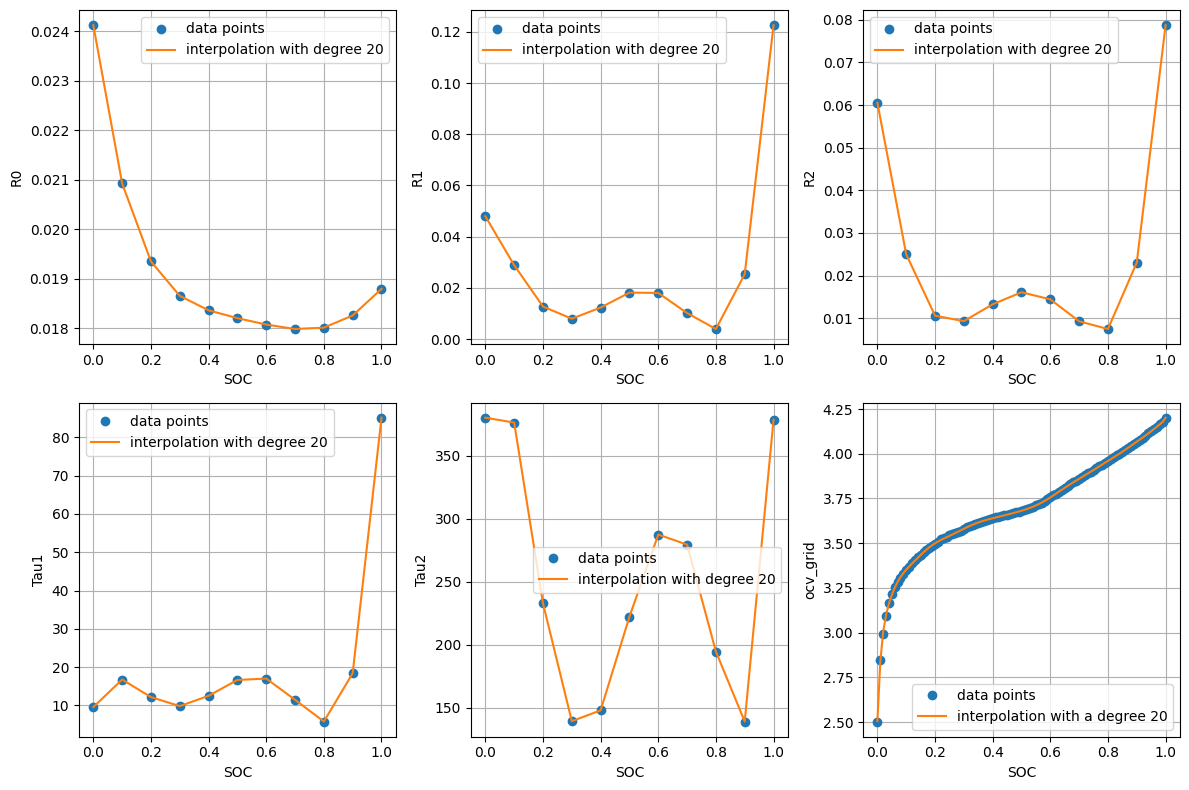

RMSE ecm 1: 0.04076250318192685
RMSE ecm 2: 0.039258992917425385
Execution times:
ECM_1 = [190.8989608, 191.0934178, 190.39574029999994, 198.96261790000005, 195.26967630000001]
ECM_2 = [269.47564150000005, 268.6752527000001, 266.7537559, 261.4719705000002, 260.64229909999995]


In [4]:
# Compare 1st and 2nd order ECM with mean parameter data on the FUDS dataset
# The comparison occurs on the average runtime (run 5 times)
# and the RMSE 
f_mean = interpolate_ecm_parameter(data=ecm_mean, deg=20, T="25", from_data="mean", order=2, plot=True)

ecm_1_time = []
log_1 = None
for _ in range(5):
    bm_1 = Nth_Order_ECM(R0=f_mean["R0"], 
                        Rs=[f_mean["R1"]],
                        Taus=[f_mean["Tau1"]],
                        ocv_grid=f_mean["ocv_grid"],
                        C_ref=C_ref*3600,
                        soc_init=1, 
                        ts=dt,
                        T="25")
    start_time = time.perf_counter()
    log_1 = simulate_ecm(bm_1, current=I, order=1)
    end_time = time.perf_counter()
    ecm_1_time.append(end_time - start_time)

ecm_2_time = []
log_2 = None
for _ in range(5):
    bm_2 = Nth_Order_ECM(R0=f_mean["R0"], 
                        Rs=[f_mean["R1"], f_mean["R2"]],
                        Taus=[f_mean["Tau1"], f_mean["Tau2"]],
                        ocv_grid=f_mean["ocv_grid"],
                        C_ref=C_ref*3600,
                        soc_init=1, 
                        ts=dt,
                        T="25")
    start_time = time.perf_counter()
    log_2 = simulate_ecm(bm_2, current=I, order=2)
    end_time = time.perf_counter()
    ecm_2_time.append(end_time - start_time)


rmse_2 = rmse(U,log_2["V"])
rmse_1 = rmse(U, log_1["V"]) 
print(f"RMSE ecm 1: {rmse_1}\nRMSE ecm 2: {rmse_2}")

print(f"Execution times:\nECM_1 = {ecm_1_time}\nECM_2 = {ecm_2_time}")


ecm 1 execution time: 193.32408261999998, ecm 2 execution time: 265.4037839400001


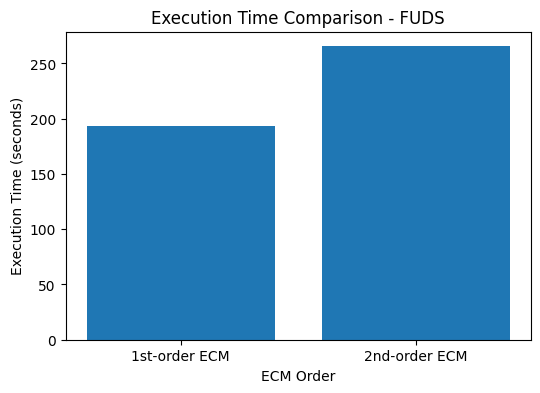

In [5]:
# Plot the execution time of the ECMs

print(f"ecm 1 execution time: {np.mean(ecm_1_time)}, ecm 2 execution time: {np.mean(ecm_2_time)}")

# Create a bar plot
plt.figure(figsize=(6, 4))
plt.bar(['1st-order ECM', '2nd-order ECM'], [np.mean(ecm_1_time), np.mean(ecm_2_time)])
plt.xlabel('ECM Order')
plt.ylabel('Execution Time (seconds)')
# plt.savefig("1st_2nd_order_ecm_comparison_FUDS_execution_time.pdf")
plt.title('Execution Time Comparison - FUDS')
plt.show()